In [1]:
import pandas as pd
import numpy as np
import WranglerFunctions as wf
import matplotlib.pyplot as plt

In [2]:
financial_original = pd.read_csv('../Datasets/Financial_dataset/F3METL_Comp.csv', index_col = False)
inflation_original = pd.read_csv('../Datasets/Economic_dataset/Inflation.csv', index_col = False)

In [3]:
clean_inflation, date_err = wf.Inflation_Wrangler(inflation_original)

C:\Users\vojno\OneDrive - University of Bristol\Applied Data Science\Mining\Notebooks\Data_exploration_notebooks\WranglerFunctions.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column_name][i] = pd.to_datetime(df[column_name][i], format = format_string)


In [4]:
clean_financial = wf.F3Metl_Comp_Wrangler(financial_original)

In [5]:
clean_inflation

,Date,Inflation Rate
362,1991-10-31 00:00:00,6.8
361,1991-11-30 00:00:00,7.1
360,1991-12-31 00:00:00,7.2
359,1992-01-31 00:00:00,7.0
358,1992-02-29 00:00:00,6.9
...,...,...
4,2021-08-31 00:00:00,3.2
3,2021-09-30 00:00:00,3.1
2,2021-10-31 00:00:00,4.2
1,2021-11-30 00:00:00,5.1


In [6]:
clean_financial['RIO LN Equity']

,PX_OPEN,PX_HIGH,PX_LOW,PX_LAST,PX_VOLUME,EBITDA,PE_RATIO
Dates,,,,,,,
2000-01-04,1239.156,1243.287,1210.242,1217.677,3585947,1404.1713,25.8338
2000-01-05,1210.242,1218.503,1159.024,1163.981,3342568,1404.1713,24.7820
2000-01-06,1173.068,1218.503,1173.068,1205.286,9503906,1404.1713,25.6770
2000-01-07,1214.373,1226.764,1185.459,1220.982,7508500,1404.1713,25.8881
2000-01-10,1224.286,1226.764,1181.329,1193.720,6438418,1404.1713,25.3255
...,...,...,...,...,...,...,...
2022-01-25,5312.000,5353.000,5276.000,5311.000,2538309,19744.0000,6.1803
2022-01-26,5422.000,5506.000,5388.000,5434.000,2878571,19744.0000,6.3346
2022-01-27,5399.000,5623.000,5384.000,5569.000,2943232,19744.0000,6.4205


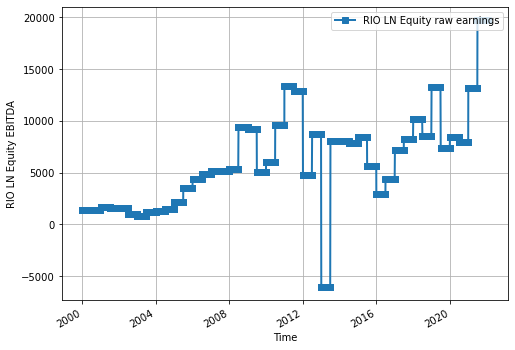

In [7]:
fig = plt.figure(figsize=(8,6))

plt.plot(clean_financial['RIO LN Equity'].index, clean_financial['RIO LN Equity']['EBITDA'], label='RIO LN Equity raw earnings', lw=2, marker='s')
plt.xlabel('Time')
plt.ylabel('RIO LN Equity EBITDA')
plt.grid()
plt.legend(loc='upper right')

plt.gcf().autofmt_xdate()

plt.show()

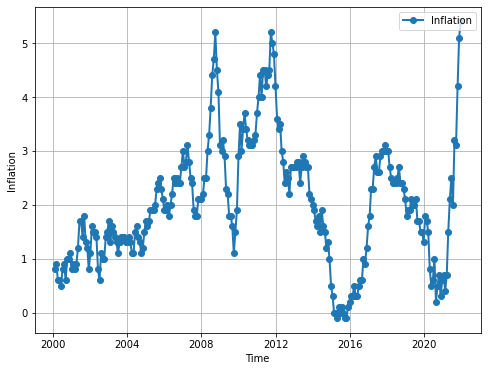

In [8]:
fig = plt.figure(figsize=(8,6))

plt.plot(clean_inflation[clean_inflation['Date'] > clean_financial['RIO LN Equity'].index[0]]['Date'], clean_inflation[clean_inflation['Date'] > clean_financial['RIO LN Equity'].index[0]]['Inflation Rate'], label='Inflation', lw=2, marker='o')
plt.xlabel('Time')
plt.ylabel('Inflation')
plt.grid()
plt.legend(loc='upper right')

plt.show()

In [9]:
earnings_unique = clean_financial['RIO LN Equity']['EBITDA'].drop_duplicates()

In [10]:
clean_inflation.index = clean_inflation['Date']
clean_inflation = clean_inflation.drop('Date', axis = 1)

In [11]:
earnings_unique

Dates
2000-01-04     1404.1713
2000-06-30     1369.7180
2001-01-01     1628.6273
2001-07-02     1568.2136
2001-12-31     1583.2303
2002-07-01      945.0000
2002-12-31      840.0000
2003-06-30     1178.0000
2003-12-31     1324.0000
2004-06-30     1517.0000
2004-12-31     2158.2401
2005-06-30     3508.0000
2006-01-02     4423.0000
2006-06-30     4862.0000
2007-01-01     5180.0000
2007-12-31     5378.0000
2008-06-30     9364.0000
2008-12-31     9221.0000
2009-06-30     5032.0000
2009-12-31     6024.0000
2010-06-30     9635.0000
2010-12-31    13406.0000
2011-06-30    12893.0000
2012-01-02     4780.0000
2012-07-02     8763.0000
2012-12-31    -6066.0000
2013-07-01     8038.0000
2014-06-30     7841.0000
2014-12-31     8399.0000
2015-06-30     5625.0000
2015-12-31     2898.0000
2016-06-30     4367.0000
2017-01-02     7184.0000
2017-06-30     8240.0000
2018-01-01    10209.0000
2018-07-02     8507.0000
2018-12-31    13251.0000
2019-07-01     7372.0000
2019-12-31     8478.0000
2020-06-30     7942

In [12]:
clean_inflation

,Inflation Rate
Date,
1991-10-31,6.8
1991-11-30,7.1
1991-12-31,7.2
1992-01-31,7.0
1992-02-29,6.9
...,...
2021-08-31,3.2
2021-09-30,3.1
2021-10-31,4.2
